In [1]:
from numpy import * # this gives us math functions like sin, cos, exp, and constants like pi
import matplotlib.pyplot as plt # for creating plots

# coherent addition of fields
(I created this box for regular text by clicking outside of it then typing Ctrl + M. Also, use Shift + enter to run the cells below)

In [81]:
# interference from light diffracting out of a single slit

a = 1e-5 # the slit width -- try changing this value by an order of magnitude or so 
L = 0.03 # the distance from the sources to the screen where we look for interference

# lmbda_list = [8e-7,5.32e-7,4e-7] # a list of wavelengths to try: red, green, blue
lmbda_list = [6.85e-7,5.32e-7,4.8e-7] # a list of wavelengths to try: red, green, blue
colors = ['red','green','blue'] # names of the colors, just for plotting purposes

I1 = zeros((len(lmbda_list),n_samples)) # a 2D list of zeros. we'll store the intensity values here

for j,lmbda_a in enumerate(lmbda_list): # for each wavelength, calculate the diffraction pattern
    
    ka = 2*pi/lmbda_a # the "wavenumber"

    # the value of the field at the screen for one source at y1. the 1j is "imaginary i", and exp() is e^()
    Aa = lambda y1,y2: exp(1j*ka*sqrt((y1 - y2)**2 + (L**2))) 

    # we will approximate the laser hitting the slit as many separate sources
    n = 1000
    y1_vals = linspace(-a/2, a/2, n) # values from -a to a.

    # the points where we will measure the intensity at the screen
    n_samples = 100
    dy = 5e-3 # we'll measure +/- this distance on the screen 
    y2_vals = linspace(-dy,dy,n_samples)


    # at each point y2, sum of the fields and square to get the intensity
    for i,y2 in enumerate(y2_vals): # i just keeps track of what value of the loop we're in

        # sum the fields from each y1 landing at y2, then square to get intensity.
        # the abs( )**2 is how we get the magnitude squared of the complex valued field
        I1[j,i] = abs(sum([Aa(y1,y2) for y1 in y1_vals]))**2
        
print("done")

done


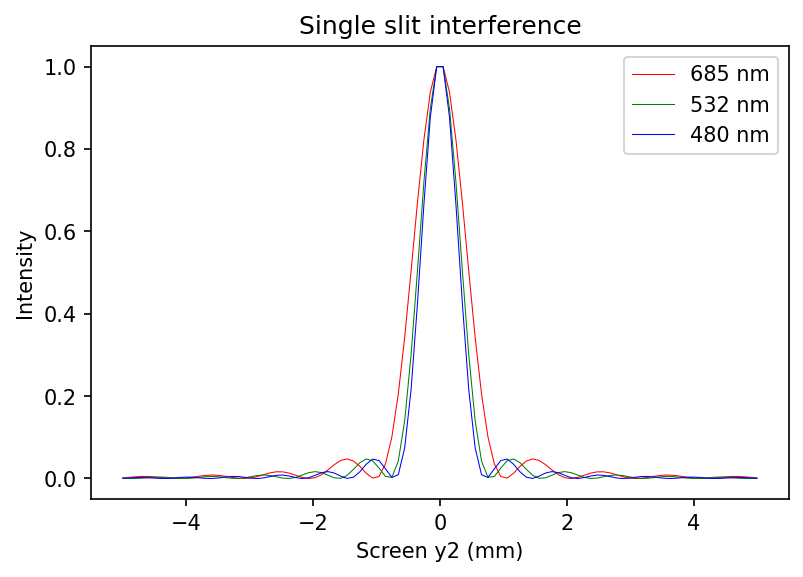

In [82]:
# plot the result
fig,ax = plt.subplots(dpi=150)

# plot the slit
# fig,axes = plt.subplots(nrows=2,ncols=1,dpi=150)
# ax0,ax = axes
# ax0.imshow([[1 if (y1 < -a/2 or y1 > a/2) else 0 for y1 in y1_vals]], #extent=[y1_vals[0],y1_vals[-1],0,1],
#           cmap='binary')
# ax0.get_xaxis().set_visible(False)
# ax0.get_yaxis().set_visible(False)
# ax0.set_aspect('auto')#len(y1_vals))

j=0
for lmbda, color in zip(lmbda_list,colors):
    ax.plot(y2_vals/1e-3, I1[j,:]/max(I1[j,:]),linewidth=0.5,color=color,label=f'{lmbda*1e9:.0f} nm')
    j += 1
ax.set_title("Single slit interference")
ax.set_ylabel("Intensity")
ax.set_xlabel("Screen y2 (mm)")
ax.legend()

In [93]:
# interference from light diffracting out of two slits. in the lab, we will illuminate both slits with 
# only one laser but we could imagine having a different laser wavelength illuminating each slit. 
# as discussed, different wavelengths will have reduced interference, which can be tested below by changing 
# lmbda_b to be different from lmbda_a.

a = 1e-5 # the slit width -- try changing this value by an order of magnitude or so
d = 2e-4 # the distance between two the two slits
L = 0.03 # the distance from the sources to the screen where we look for interference

lmbda_a = 6.8e-7 # wavelength. this is the red we had in the lab
ka = 2*pi/lmbda_a # the "wavenumber"

lmbda_b = 6.8e-7 # try changing this value to 4e-7 (cyan). the result l
kb = 2*pi/lmbda_b

Aa = lambda y1,y2: exp(1j*ka*sqrt((y1 - y2)**2 + (L**2)))
Ab = lambda y1,y2: exp(1j*kb*sqrt((y1 - y2)**2 + (L**2)))

# we will approximate the laser hitting the slit as many separate sources
n = 1000
y1_a_vals = linspace(-a, a, n) + d/2 # values from -a to a, centered around y1=d/2 
y1_b_vals = linspace(-a, a, n) - d/2 # values from -a to a, , centered around y1=-d/2

# the points where we will measure the intensity at the screen
n_samples = 1000
dy = 4e-3 # we'll measure +/- this distance on the screen 
y2_vals = linspace(-dy,dy,n_samples)

I1 = zeros(n_samples) # just a list of zeros. we'll store the intensity values here

# at each point y2, sum of the fields and square to get the intensity
for i,y2 in enumerate(y2_vals): # i just keeps track of what value of the loop we're in
    
    # for each slit, sum the fields landing at y2. then add those together and square to get intensity.
    # the abs( )**2 is how we get the magnitude squared of the complex valued field
    I1[i] = abs(sum([Aa(y1,y2) for y1 in y1_a_vals]) )**2
#                 + sum([Ab(y1,y2) for y1 in y1_b_vals]))**2
             
print("done")

done


Text(0.5, 0, 'Screen y2 (mm)')

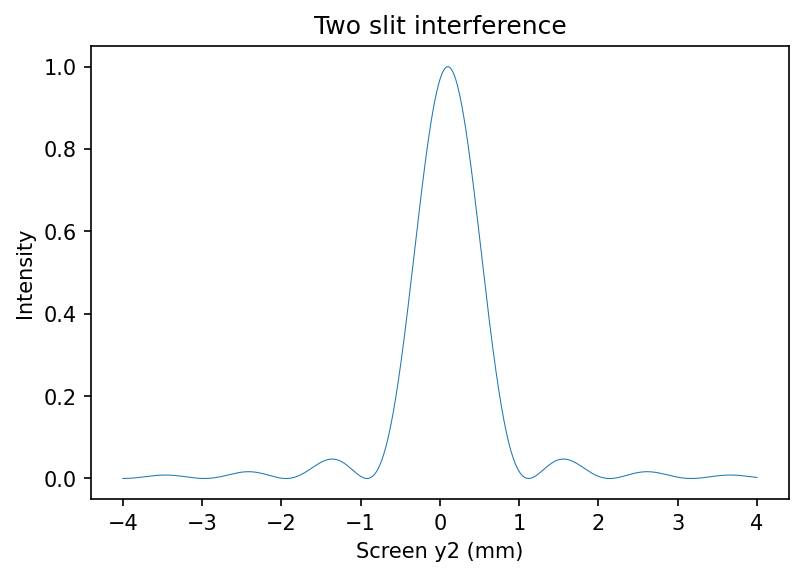

In [94]:
# plot the result
fig,ax = plt.subplots(dpi=150)
ax.plot(y2_vals/1e-3, I1/max(I1),linewidth=0.5)
ax.set_title("Two slit interference")
ax.set_ylabel("Intensity")
ax.set_xlabel("Screen y2 (mm)")